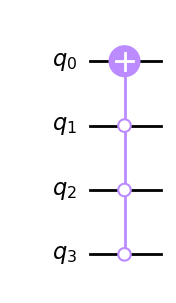

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import MCXGate
qc = QuantumCircuit(4)

qc.append(MCXGate(3, ctrl_state='000'), [2, 1, 3, 0])
qc.draw('mpl')

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library.standard_gates import RXGate


beta_para = Parameter(r'$\beta$') 

# Create a quantum circuit
qc = QuantumCircuit(5)


MCRX = RXGate(beta_para).control(num_ctrl_qubits=4, ctrl_state='0000')

# Append the gate to the circuit
qc.append(MCRX, [1, 2, 3, 4, 0])

qc.draw('mpl')

TypeError: ParameterExpression with unbound parameters ({Parameter($\beta$)}) cannot be cast to a float.

In [22]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library.standard_gates import RXGate

class ControlledRXGateWithParameter:
    def __init__(self, num_ctrl_qubits, ctrl_state, theta):
        self.num_ctrl_qubits = num_ctrl_qubits
        self.ctrl_state = ctrl_state
        self.theta = theta

    def construct_circuit(self):
        qc = QuantumCircuit(self.num_ctrl_qubits + 1)
        qc.mcrx(self.theta, list(range(self.num_ctrl_qubits)), self.num_ctrl_qubits, self.num_ctrl_qubits, self.ctrl_state)
        return qc

# Define your unbound parameter
beta_para = Parameter(r'$\beta$') 

# Create a quantum circuit
qc = QuantumCircuit(4)

# Create a controlled RX gate with the unbound parameter
num_ctrl_qubits = 3
ctrl_state = '000'
custom_gate = ControlledRXGateWithParameter(num_ctrl_qubits, ctrl_state, beta_para)
MCRX = custom_gate.construct_circuit()

# Append the gate to the circuit
qc.compose(MCRX, qubits=[1, 3, 2, 0], inplace=True)

# Visualize the circuit
qc.draw('mpl')


TypeError: mcrx() takes from 4 to 5 positional arguments but 6 were given

In [2]:
beta_para = Parameter(r'$\beta$')   # Constraint layers Parameter



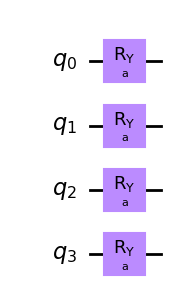

In [4]:
from qiskit.circuit.library.standard_gates import RYGate
qc=QuantumCircuit(4)
a=Parameter('a')

ry = RYGate(a)
for qbit in range(4):
    qc.append(ry, [qbit])

qc.draw('mpl')

In [ ]:
import numpy as np
import ot

# Define the size of marginals
n = matrix.shape[0]
m = matrix.shape[1]

# Define your input matrix
matrix = np.array([[1, 1, 0],
                   [1, 0, 1],
                   [0, 1, 1]])

# Define the matching constraint
m_c = np.array([[0, 1, 0],
                [1, 0, 0],
                [0, 0, 1]])

# Define the cost matrix with the matching constraint
cost_matrix = np.multiply(matrix, m_c) # Element-wise multiplication to zero out non-matching elements

# Apply Sinkhorn algorithm to converge to a doubly stochastic matrix with the matching constraint
m_ds = ot.sinkhorn(np.ones(n) / n, np.ones(m) / m, cost_matrix, reg=0.01)

m_ds